<a href="https://colab.research.google.com/github/kevchris/PortfolioSimple/blob/main/ANN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import  ndimage
%matplotlib inline


In [5]:
# Load the data:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

# Load the data into training_data, validation_data and test_data arrays:
training_data, validation_data, test_data = load_data()
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8]))

In [6]:
print(training_data[0].shape)
print(training_data[1].shape)
print("The feature dataset is :"+ "\n"+ str(training_data[0]))
print("The target dataset is : " +"\n"+ str(training_data[1]))
print("The number of points in a single data point is :" + str(len(training_data[0][1])))
print("The number of examples in the training data set is: " + str(len(training_data[0]))) 

(50000, 784)
(50000,)
The feature dataset is :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The target dataset is : 
[5 0 4 ... 8 4 8]
The number of points in a single data point is :784
The number of examples in the training data set is: 50000


In [7]:
def one_hot(j):
  n=j.shape[0]
  new_array=np.zeros((10, n))
  index= 0
  for res in j:
    new_array[res][index]=1.0
    index = index+1
  return new_array


data=np.array([0,1,3,4,2,1,2,3,5,6,3])
print(data.shape)


(11,)


In [8]:
one_hot(data)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)
The target dataset is:[5 0 4 ... 8 4 8]
The one hot encoding dataset is:


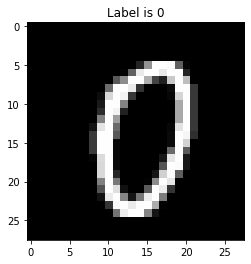

In [10]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
# Training data:
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
# Validation data:
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
# Test data:
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, test_inputs, test_set_y)

train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()
 
# Print shapes of the encoded data:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
 
# Convert the encoded data to a dataframe and visualise it:
y = pd.DataFrame(train_set_y)
print("The target dataset is:" + str(training_data[1]))
print("The one hot encoding dataset is:")
y

# Visualise a certain image from the training set:
index  = 1000
k = train_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

In [11]:
def sigmoid(Z):   
# Z is NumPy array of shape (n, m) where n is the number of neurons in the layer and m is the number of samples
    H = 1/(1+np.exp(-Z))
    sigmoid_memory = Z

# sigmoid_memory is stored as it is used later on in backpropagation 
    return H, sigmoid_memory

Z = np.arange(8).reshape(4,2)
print ("sigmoid(Z) = \n" + str(sigmoid(Z)))

sigmoid(Z) = 
(array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895]]), array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]]))


In [12]:
def relu(Z):
# Z is NumPy array of shape (n, m) where n is the number of neurons in the layer and m is the number of samples 
    H = np.maximum(0,Z)
    
    assert(H.shape == Z.shape)
    
    relu_memory = Z 

# relu_memory is stored as it is used later on in backpropagation
    return H, relu_memory
 
Z = np.array([1, 3, -1, -4, -5, 7, 9, 18]).reshape(4,2)
print ("relu(Z) = " + str(relu(Z)))

relu(Z) = (array([[ 1,  3],
       [ 0,  0],
       [ 0,  7],
       [ 9, 18]]), array([[ 1,  3],
       [-1, -4],
       [-5,  7],
       [ 9, 18]]))


In [14]:
def softmax(Z):
# Z is NumPy array of shape (n, m) where n is the number of neurons in the layer and m is the number of samples 
    Z_exp = np.exp(Z)
 
    Z_sum = np.sum(Z_exp,axis = 0, keepdims = True)
    
    H = Z_exp/Z_sum  #normalising step
    softmax_memory = Z

# softmax_memory is stored as it is used later on in backpropagation
    return H, softmax_memory

#Z = np.array(np.arange(30)).reshape(10,3)
H, softmax_memory = softmax(Z)
print(H)

print(softmax_memory)

def initialize_parameters(dimensions):
# dimensions is a list containing the number of neuron in each layer in the network
# It returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL":
 
    np.random.seed(2)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1
 
    for l in range(1, L): 
        parameters['W'+str(l)]=np.random.randn(dimensions[l],dimensions[l-1])*0.1
        parameters['b' + str(l)]=np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape==(dimensions[l],dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))
        
    return parameters

[[3.35334633e-04 3.05897118e-07]
 [4.53826075e-05 2.78942065e-10]
 [8.31211451e-07 1.67014167e-05]
 [9.99618452e-01 9.99982992e-01]]
[[ 1  3]
 [-1 -4]
 [-5  7]
 [ 9 18]]


In [16]:
def initialize_parameters(dimensions):
# dimensions is a list containing the number of neuron in each layer in the network
# It returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL":
 
    np.random.seed(2)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1
 
    for l in range(1, L): 
        parameters['W'+str(l)]=np.random.randn(dimensions[l],dimensions[l-1])*0.1
        parameters['b' + str(l)]=np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape==(dimensions[l],dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))
        
    return parameters

    # Declare the dimensions:
dimensions  = [784, 3, 7, 10]
 
# Run the initialize_parameters() function:
parameters = initialize_parameters(dimensions)
 
# Print the resultant weights and biases:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.06650944 -0.19626047  0.2112715 ]
 [-0.28074571 -0.13967752  0.02641189]
 [ 0.10925169  0.06646016  0.08565535]
 [-0.11058228  0.03715795  0.13440124]
 [-0.16421272 -0.1153127   0.02013163]
 [ 0.13985659  0.07228733 -0.10717236]
 [-0.05673344 -0.03663499 -0.15460347]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
